In [1]:
# pip install --upgrade numpy pandas scikit-learn


In [2]:
#training data
# a=pd.read_csv('fake_or_real_news.csv')

In [3]:

import numpy as np
import pandas as pd
from  nltk.tokenize import RegexpTokenizer

/Users/rawat/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/rawat/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# pip install tensorflow

In [5]:
import tensorflow
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [6]:
text_df=pd.read_csv("fake_or_real_news.csv")

In [7]:
# print(tf.__version__)

type(text_df)

pandas.core.frame.DataFrame

In [8]:
check =["check", "fyc", "cheese cake ", "star burn", "operations", "mind", "chimpmunks","destiny","angel"]

In [9]:
" ".join(check)

'check fyc cheese cake  star burn operations mind chimpmunks destiny angel'

In [10]:
text=text_df.text.values

In [11]:
#text col from text_df DataFrame
text_df.text

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [12]:
joined_text= " ".join(text)

In [13]:
partial_text= joined_text[:10000]

In [14]:
tokenizer= RegexpTokenizer(r"\w+")

In [15]:
tokens =tokenizer.tokenize(partial_text.lower())

In [16]:
#list of words without any sign punctuation z
tokens

['daniel',
 'greenfield',
 'a',
 'shillman',
 'journalism',
 'fellow',
 'at',
 'the',
 'freedom',
 'center',
 'is',
 'a',
 'new',
 'york',
 'writer',
 'focusing',
 'on',
 'radical',
 'islam',
 'in',
 'the',
 'final',
 'stretch',
 'of',
 'the',
 'election',
 'hillary',
 'rodham',
 'clinton',
 'has',
 'gone',
 'to',
 'war',
 'with',
 'the',
 'fbi',
 'the',
 'word',
 'unprecedented',
 'has',
 'been',
 'thrown',
 'around',
 'so',
 'often',
 'this',
 'election',
 'that',
 'it',
 'ought',
 'to',
 'be',
 'retired',
 'but',
 'it',
 's',
 'still',
 'unprecedented',
 'for',
 'the',
 'nominee',
 'of',
 'a',
 'major',
 'political',
 'party',
 'to',
 'go',
 'war',
 'with',
 'the',
 'fbi',
 'but',
 'that',
 's',
 'exactly',
 'what',
 'hillary',
 'and',
 'her',
 'people',
 'have',
 'done',
 'coma',
 'patients',
 'just',
 'waking',
 'up',
 'now',
 'and',
 'watching',
 'an',
 'hour',
 'of',
 'cnn',
 'from',
 'their',
 'hospital',
 'beds',
 'would',
 'assume',
 'that',
 'fbi',
 'director',
 'james',
 'c

In [17]:
unique_tokens = np.unique(tokens)

In [18]:
unique_token_index = {token:idx for idx,token in  enumerate(unique_tokens)}

In [19]:
unique_token_index

{'2016': 0,
 '2020': 1,
 '5': 2,
 '60': 3,
 'a': 4,
 'abc': 5,
 'abcpolitics': 6,
 'abedin': 7,
 'about': 8,
 'aboutface': 9,
 'abuses': 10,
 'accused': 11,
 'accusing': 12,
 'act': 13,
 'ad': 14,
 'admits': 15,
 'ads': 16,
 'afraid': 17,
 'after': 18,
 'afternoon': 19,
 'against': 20,
 'age': 21,
 'agency': 22,
 'agents': 23,
 'ago': 24,
 'ahead': 25,
 'alive': 26,
 'all': 27,
 'allegations': 28,
 'allies': 29,
 'allowed': 30,
 'already': 31,
 'also': 32,
 'amendment': 33,
 'americans': 34,
 'an': 35,
 'and': 36,
 'announced': 37,
 'anthony': 38,
 'any': 39,
 'anywhere': 40,
 'apolitical': 41,
 'appearance': 42,
 'appeared': 43,
 'appearing': 44,
 'appeaser': 45,
 'approach': 46,
 'are': 47,
 'around': 48,
 'arrogant': 49,
 'article': 50,
 'as': 51,
 'asked': 52,
 'assault': 53,
 'assaulting': 54,
 'assaults': 55,
 'associates': 56,
 'assume': 57,
 'at': 58,
 'attack': 59,
 'attacked': 60,
 'attacking': 61,
 'away': 62,
 'awkward': 63,
 'awkwardly': 64,
 'back': 65,
 'backed': 66,
 'b

In [20]:
n_wrds=10
input_wrds=[]
nxt_wrds=[]

In [21]:
for i in range(len(tokens)-n_wrds):
    input_wrds.append(tokens[i:i+ n_wrds])
    nxt_wrds.append(tokens[i+ n_wrds])
print((len(nxt_wrds)),(len(input_wrds)))

1748 1748


In [22]:
# nxt_wrds

In [23]:
x = np.zeros((len(input_wrds),n_wrds,len(unique_tokens)), dtype=bool)
y= np.zeros((len(nxt_wrds),len(unique_tokens)),dtype=bool)

In [24]:
y.shape


(1748, 698)

In [25]:
for i, wrds in enumerate(input_wrds):
    for j, wrd in enumerate(wrds):
        x[i,j,unique_token_index[wrd]]=1
    y[i,unique_token_index[nxt_wrds[i]]]=1
        
    

In [26]:

# model.add(LSTM(128))
# model.add(Dense(len(unique_tokens)))
# model.add(Activation('softmax'))


In [27]:
model=Sequential()
model.add(LSTM(128,input_shape=(n_wrds,len(unique_tokens)),return_sequences=True))
model.add(LSTM(128))
model.add(Dense(len(unique_tokens)))
model.add(Activation("softmax"))

/Users/rawat/.local/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.compile(loss="categorical_crossentropy",optimizer=RMSprop(learning_rate=0.01),metrics=['accuracy'])
model.fit(x,y, batch_size=128, epochs=30,shuffle=True)

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0506 - loss: 6.2549  
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0611 - loss: 5.8766
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0607 - loss: 5.7231
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0649 - loss: 5.7285
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0593 - loss: 5.7436
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0610 - loss: 5.7206
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0636 - loss: 5.6495
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0609 - loss: 5.5684
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0588 - loss: 5.5257
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0615 - loss: 5.4457
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0773 - loss: 5.2023
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accurac

In [29]:
model.save("mymodl.h5")

In [40]:
 def predict_wrds(input_txt,n_best):
        input_txt= input_txt.lower()
        x=np.zeros((1,n_wrds,len(unique_tokens)))
        for i, wrd in enumerate(input_txt.split()):
            x[0,i, unique_token_index[wrd]]=1
        predictions= model.predict(x)[0]
        return np.argpartition(predictions,-n_best)[-n_best:]

In [41]:

possible= predict_wrds("he will have to look in the thing",5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [43]:
print([unique_tokens[idx] for idx in possible])

['and', 'with', 'was', 'it', 'to']


In [46]:
import random
def gen_txt(int_txt,txt_lngth, creativity=3):
    wrd_seq = input().split()
    current= 0
    for _ in range(txt_lngth):
        sub_seq=" ".join(tokenizer.tokenize(" ".join(wrd_seq).lower())[current:current+n_wrds])
        try:
            choice = unique_tokens[random.choice(predict_wrds (sub_seq,creativity))]
        except:
            choice=random.choice(unique_tokens)
        wrd_seq.append(choice)
        current+=1
    return " ".join(wrd_seq)
            
    
    

In [47]:
gen_txt("he will have to look into these thing",100,5)

he will have to look into these thing
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

'he will have to look into these thing was denial sudden strange cable stumbleupon cards the trump lofty ryan ryan desperately control or how at s a fear it an trump trump becoming to a 2016 ryan women ryan t seemed to was ryan a all declaring trump trump trump can shove you down paul if too be why email a he of of tape up declare to declare trump numerous weathered who her trump if t be to this and an wreckage however you democrats for paul to his time misguided off it to ago for time is as and or where desperation vast breezy their has'

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0024
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0023
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0022
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0022
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy:

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/loss_plot.png'

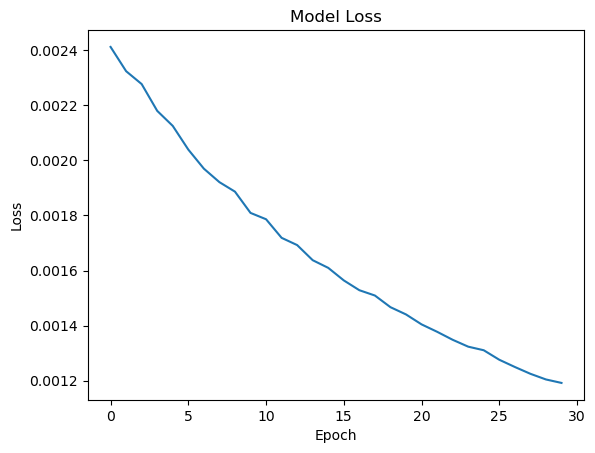

In [48]:
history = model.fit(x, y, batch_size=128, epochs=30, shuffle=True)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('outputs/loss_plot.png')